# Quora data challenge

## 1. Data exploration and treatment

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
t1 = pd.read_csv('t1_user_active_min.csv')
t2 = pd.read_csv('t2_user_variant.csv')
t3 = pd.read_csv('t3_user_active_min_pre.csv')
t4 = pd.read_csv('t4_user_attributes.csv')

t1_user_active_min.csv
---
This table contains active minutes data logged after experiment started.
Each row represents the total number of minutes spent on site for each user on a date.
If a user never visited the site for a given date, there wouldn't be data for that uid on that date.
- uid: user ID
- dt: date when corresponding active minutes are registered
- active_mins: number of minutes spent on site for the date

In [3]:
t1.head()

,uid,dt,active_mins
0,0,2019-02-22,5.0
1,0,2019-03-11,5.0
2,0,2019-03-18,3.0
3,0,2019-03-22,4.0
4,0,2019-04-03,9.0


In [4]:
t1.shape

(1066402, 3)

In [5]:
t1.columns[t1.isnull().any()]

Index([], dtype='object')

In [6]:
len(set(list(t1.uid)))

46633

In [7]:
len(set(list(t1.dt)))

150

In [8]:
pd.to_datetime(t1.dt).describe()

count                 1066402
unique                    150
top       2019-02-06 00:00:00
freq                     8675
first     2019-02-06 00:00:00
last      2019-07-05 00:00:00
Name: dt, dtype: object

In [9]:
pd.to_datetime(t1.dt).max() - pd.to_datetime(t1.dt).min()

Timedelta('149 days 00:00:00')

In [11]:
from datetime import timedelta
pd.to_datetime("2019-02-06") - timedelta(days = 149)

Timestamp('2018-09-10 00:00:00')

In [12]:
t1.active_mins.describe()

count    1.066402e+06
mean     3.616809e+01
std      1.270484e+03
min      1.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.700000e+01
max      9.999900e+04
Name: active_mins, dtype: float64

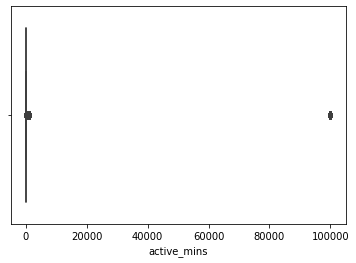

In [13]:
sns.boxplot(t1.active_mins)

In [14]:
t1.active_mins.quantile([0,.05,.1,.25,.5,.75,.9,.95,.99,1])

0.00        1.0
0.05        1.0
0.10        1.0
0.25        2.0
0.50        5.0
0.75       17.0
0.90       50.0
0.95       89.0
0.99      227.0
1.00    99999.0
Name: active_mins, dtype: float64

In [15]:
# remove extreme outliers - user can't be online in a day for more than 1440 minutes
t1 = t1[t1.active_mins<=1440]

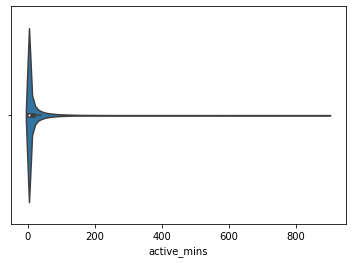

In [16]:
sns.violinplot(t1.active_mins)

In [17]:
t1.active_mins.quantile([0,.05,.1,.25,.5,.75,.9,.95,.99,1])

0.00      1.0
0.05      1.0
0.10      1.0
0.25      2.0
0.50      5.0
0.75     17.0
0.90     50.0
0.95     89.0
0.99    226.0
1.00    897.0
Name: active_mins, dtype: float64

t2_user_variant.csv
---
This table contains users’ treatment assignment.
Each row represents the assignment information for a unique user.
- uid: user ID
- variant_number: the experiment variant user is in. 0 for control, 1 for treatment
- dt: date when user entered the experiment, should be ‘2019-02-06’ for all users
- signup_date: the date string that user signed up on

In [18]:
t2.head()

,uid,variant_number,dt,signup_date
0,0,0,2019-02-06,2018-09-24
1,1,0,2019-02-06,2016-11-07
2,2,0,2019-02-06,2018-09-17
3,3,0,2019-02-06,2018-03-04
4,4,0,2019-02-06,2017-03-09


In [19]:
t2.columns[t2.isnull().any()]

Index([], dtype='object')

In [20]:
t2.shape

(50000, 4)

In [21]:
len(set(list(t2.uid)))

50000

In [22]:
set(list(t2.variant_number))

{0, 1}

In [23]:
len(set(list(t2.dt)))

1

In [24]:
pd.to_datetime(t2.dt).describe()

count                   50000
unique                      1
top       2019-02-06 00:00:00
freq                    50000
first     2019-02-06 00:00:00
last      2019-02-06 00:00:00
Name: dt, dtype: object

In [25]:
len(set(list(t2.signup_date)))

2679

In [26]:
t2["days_from_experiment"] = pd.to_datetime(t2.dt) - pd.to_datetime(t2.signup_date)

In [27]:
t2.head()

,uid,variant_number,dt,signup_date,days_from_experiment
0,0,0,2019-02-06,2018-09-24,135 days
1,1,0,2019-02-06,2016-11-07,821 days
2,2,0,2019-02-06,2018-09-17,142 days
3,3,0,2019-02-06,2018-03-04,339 days
4,4,0,2019-02-06,2017-03-09,699 days


In [28]:
t2.days_from_experiment = t2.days_from_experiment.astype('timedelta64[D]')

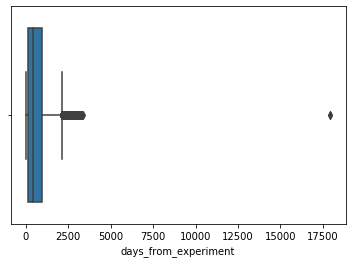

In [29]:
sns.boxplot(t2.days_from_experiment)

In [30]:
t2.days_from_experiment.quantile([0,.05,.1,.25,.5,.75,.9,.95,.99,1])

0.00        2.00
0.05       12.00
0.10       25.00
0.25      131.00
0.50      417.00
0.75      936.00
0.90     1501.10
0.95     1939.00
0.99     2375.01
1.00    17933.00
Name: days_from_experiment, dtype: float64

In [31]:
t2.sort_values('days_from_experiment', ascending=False).head()

,uid,variant_number,dt,signup_date,days_from_experiment
8001,8001,0,2019-02-06,1970-01-01,17933.0
20758,20758,0,2019-02-06,1970-01-01,17933.0
33854,33854,0,2019-02-06,2009-12-03,3352.0
32802,32802,0,2019-02-06,2010-01-06,3318.0
14980,14980,0,2019-02-06,2010-01-14,3310.0


In [32]:
# Replace values with signup before 2009 (Quora started in 2009!) using median substitution
t2.loc[t2['days_from_experiment'] > 3650, 'days_from_experiment'] = t2.days_from_experiment.median()
t2.loc[t2['uid'].isin([8001, 20758]), 'signup_date'] = (pd.to_datetime('2019-02-06') 
                                                        - timedelta(days = t2.days_from_experiment.median())).strftime('%Y-%m-%d')

In [33]:
## Note: 8001, 20758 were treated

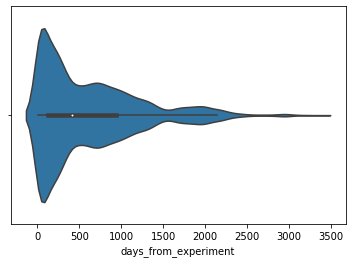

In [34]:
sns.violinplot(t2.days_from_experiment)

t3_user_active_min_pre.csv
---
This table contains active minutes data before the experiment started.
It has a similar format as t1, except the dt range can extend before the experiment start date.
- uid: user ID
- dt: date when corresponding active minutes are registered
- active_mins: number of minutes spent on site for the date

In [35]:
t3.head()

,uid,dt,active_mins
0,0,2018-09-24,3.0
1,0,2018-11-08,4.0
2,0,2018-11-24,3.0
3,0,2018-11-28,6.0
4,0,2018-12-02,6.0


In [36]:
t3.columns[t3.isnull().any()]

Index([], dtype='object')

In [37]:
t3.shape

(1190093, 3)

In [38]:
len(set(list(t3.uid)))

49697

In [39]:
len(set(list(t3.dt)))

180

In [40]:
pd.to_datetime(t3.dt).describe()

count                 1190093
unique                    180
top       2019-02-01 00:00:00
freq                     9175
first     2018-08-10 00:00:00
last      2019-02-05 00:00:00
Name: dt, dtype: object

In [41]:
# reduce the time range to match the experiment time window
t3 = t3[pd.to_datetime(t3.dt)>=(pd.to_datetime(t3.dt).max()  - timedelta(days = 149))]

In [42]:
pd.to_datetime(t3.dt).max() - pd.to_datetime(t3.dt).min()

Timedelta('149 days 00:00:00')

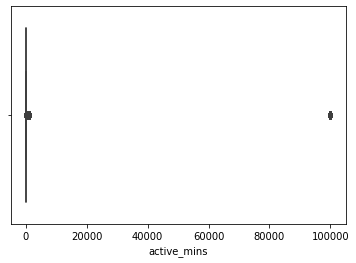

In [43]:
sns.boxplot(t3.active_mins)

In [44]:
t3.active_mins.quantile([0,.05,.1,.25,.5,.75,.9,.95,.99,1])

0.00        1.0
0.05        1.0
0.10        1.0
0.25        2.0
0.50        4.0
0.75       14.0
0.90       45.0
0.95       82.0
0.99      210.0
1.00    99999.0
Name: active_mins, dtype: float64

In [45]:
# remove extreme outliers - user can't be online in a day for more than 1440 minutes
t3 = t3[t3.active_mins<=1440]

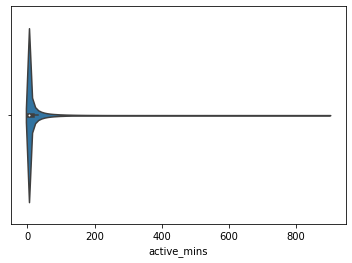

In [46]:
sns.violinplot(t3.active_mins)

In [47]:
t3.active_mins.quantile([0,.05,.1,.25,.5,.75,.9,.95,.99,1])

0.00      1.0
0.05      1.0
0.10      1.0
0.25      2.0
0.50      4.0
0.75     14.0
0.90     45.0
0.95     82.0
0.99    209.0
1.00    897.0
Name: active_mins, dtype: float64

t4_user_attributes.csv
---
This table contains data about some user attributes.
Each row represents attributes of a unique user.
- uid: user ID
- user_type: segment that a user belongs to, measured by activity level of the user. Can be ‘new_user’, ‘non_reader’, ‘reader’ or ‘contributor’
- gender: user gender. Can be ‘male’, ‘female’ or ‘unknown’

In [48]:
t4.head()

,uid,gender,user_type
0,0,male,non_reader
1,1,male,reader
2,2,male,non_reader
3,3,male,non_reader
4,4,male,non_reader


In [49]:
t4.columns[t4.isnull().any()]

Index([], dtype='object')

In [50]:
t4.shape

(50000, 3)

In [51]:
len(set(list(t4.uid)))

50000

In [52]:
set(list(t4.gender))

{'female', 'male', 'unknown'}

In [53]:
set(list(t4.user_type))

{'contributor', 'new_user', 'non_reader', 'reader'}

## 2. Create datasets for analysis

In [54]:
set(list(t2.uid)) - set(list(t4.uid))

set()

In [55]:
# two users were dropped because thier signup date was not available
set(list(t4.uid)) - set(list(t2.uid))

set()

In [56]:
user_attributes = t2.merge(t4, on='uid')

In [57]:
user_attributes.shape

(50000, 7)

In [58]:
user_attributes = user_attributes.drop('dt', axis=1)

In [59]:
user_attributes.head()

,uid,variant_number,signup_date,days_from_experiment,gender,user_type
0,0,0,2018-09-24,135.0,male,non_reader
1,1,0,2016-11-07,821.0,male,reader
2,2,0,2018-09-17,142.0,male,non_reader
3,3,0,2018-03-04,339.0,male,non_reader
4,4,0,2017-03-09,699.0,male,non_reader


In [60]:
control = t3.groupby('uid', as_index=False).agg({'active_mins':sum})

In [61]:
experiment = t1.groupby('uid', as_index=False).agg({'active_mins':sum})

In [62]:
experiment.head()

,uid,active_mins
0,0,43.0
1,1,15205.0
2,2,17.0
3,3,77.0
4,4,39.0


In [63]:
control.head()

,uid,active_mins
0,0,70.0
1,1,15618.0
2,2,37.0
3,3,29.0
4,4,57.0


In [64]:
experiment.active_mins.quantile([0,.05,.1,.25,.5,.75,.9,.95,.99,1])

0.00        1.00
0.05        3.00
0.10        6.00
0.25       18.00
0.50       55.00
0.75      199.00
0.90      856.80
0.95     2181.40
0.99     7805.08
1.00    46742.00
Name: active_mins, dtype: float64

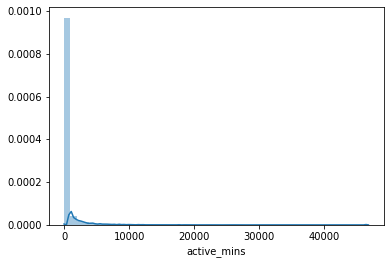

In [66]:
sns.distplot(experiment.active_mins)

In [ ]:
# Experiment and control datasets with user attributes

In [67]:
len(set(list(user_attributes.uid)).intersection(set(list(control.uid))))

49675

In [68]:
control.shape

(49675, 2)

In [69]:
control_attr = control.merge(user_attributes, on='uid', how='left')

In [70]:
control_attr.shape

(49675, 7)

In [71]:
control_attr.head()

,uid,active_mins,variant_number,signup_date,days_from_experiment,gender,user_type
0,0,70.0,0,2018-09-24,135.0,male,non_reader
1,1,15618.0,0,2016-11-07,821.0,male,reader
2,2,37.0,0,2018-09-17,142.0,male,non_reader
3,3,29.0,0,2018-03-04,339.0,male,non_reader
4,4,57.0,0,2017-03-09,699.0,male,non_reader


In [72]:
len(set(list(user_attributes.uid)).intersection(set(list(experiment.uid))))

46633

In [73]:
experiment.shape

(46633, 2)

In [74]:
experiment_attr = experiment.merge(user_attributes, on='uid', how='left')

In [75]:
experiment_attr.shape

(46633, 7)

In [76]:
experiment_attr.head()

,uid,active_mins,variant_number,signup_date,days_from_experiment,gender,user_type
0,0,43.0,0,2018-09-24,135.0,male,non_reader
1,1,15205.0,0,2016-11-07,821.0,male,reader
2,2,17.0,0,2018-09-17,142.0,male,non_reader
3,3,77.0,0,2018-03-04,339.0,male,non_reader
4,4,39.0,0,2017-03-09,699.0,male,non_reader


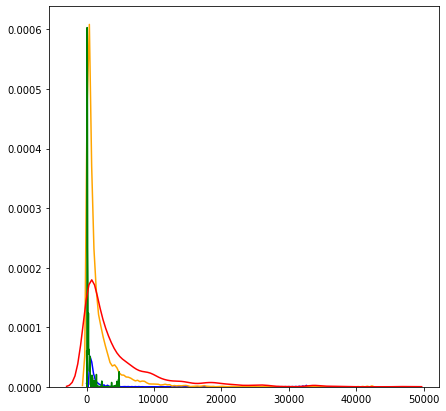

In [147]:
from matplotlib import pyplot

target_0 = experiment_attr.loc[experiment_attr['user_type'] == 'non_reader']
target_1 = experiment_attr.loc[experiment_attr['user_type'] == 'reader']
target_2 = experiment_attr.loc[experiment_attr['user_type'] == 'new_user']
target_3 = experiment_attr.loc[experiment_attr['user_type'] == 'contributor']

a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.distplot(target_0[['active_mins']], hist=False, color='blue')
sns.distplot(target_1[['active_mins']], hist=False, color= 'orange')
sns.distplot(target_2[['active_mins']], hist=False, color= 'green')
sns.distplot(target_3[['active_mins']], hist=False, color= 'red')

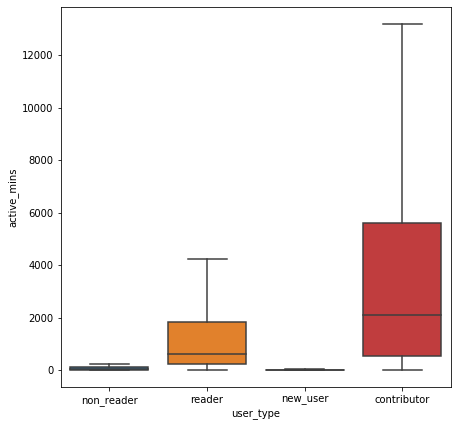

In [145]:
a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(y=experiment_attr.active_mins, x=experiment_attr.user_type, showfliers=False)

In [ ]:
# Observation: Contributers spend a lot more time on the platform, followed by readers

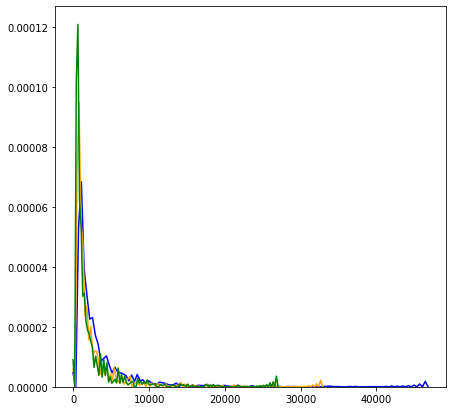

In [148]:
target_0 = experiment_attr.loc[experiment_attr['gender'] == 'male']
target_1 = experiment_attr.loc[experiment_attr['gender'] == 'female']
target_2 = experiment_attr.loc[experiment_attr['gender'] == 'unknown']

a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.distplot(target_0[['active_mins']], hist=False, color='blue')
sns.distplot(target_1[['active_mins']], hist=False, color= 'orange')
sns.distplot(target_2[['active_mins']], hist=False, color= 'green')

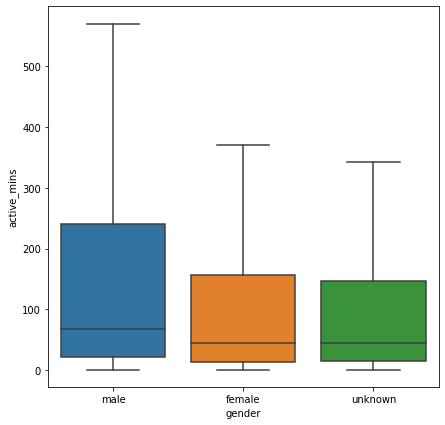

In [146]:
a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(y=experiment_attr.active_mins, x=experiment_attr.gender, showfliers=False)

In [ ]:
# Observation: men seem to spend more time on the platform

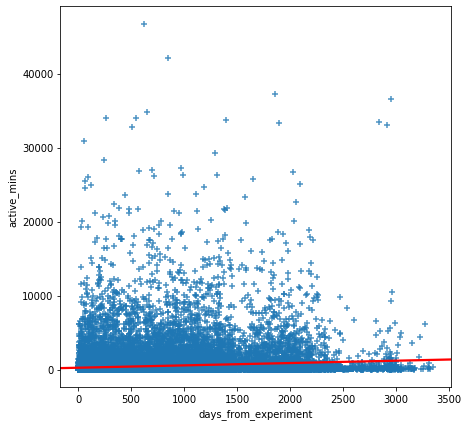

In [79]:
a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.regplot(x="days_from_experiment", y="active_mins", data=experiment_attr,marker="+", line_kws={'color': 'red'})

In [ ]:
# Observation: older users seem to spend more time on average on the platform

In [80]:
control.active_mins.quantile([0,.05,.1,.25,.5,.75,.9,.95,.99,1])

0.00        1.00
0.05        3.00
0.10        6.00
0.25       16.00
0.50       46.00
0.75      155.00
0.90      631.00
0.95     1647.60
0.99     6702.04
1.00    40041.00
Name: active_mins, dtype: float64

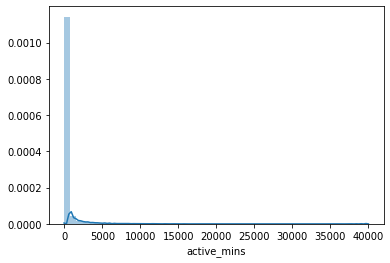

In [81]:
sns.distplot(control.active_mins)

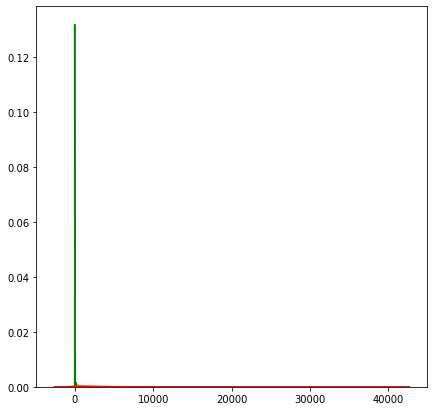

In [150]:
target_0 = control_attr.loc[control_attr['user_type'] == 'non_reader']
target_1 = control_attr.loc[control_attr['user_type'] == 'reader']
target_2 = control_attr.loc[control_attr['user_type'] == 'new_user']
target_3 = control_attr.loc[control_attr['user_type'] == 'contributor']

a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.distplot(target_0[['active_mins']], hist=False, color='blue')
sns.distplot(target_1[['active_mins']], hist=False, color= 'orange')
sns.distplot(target_2[['active_mins']], hist=False, color= 'green')
sns.distplot(target_3[['active_mins']], hist=False, color= 'red')

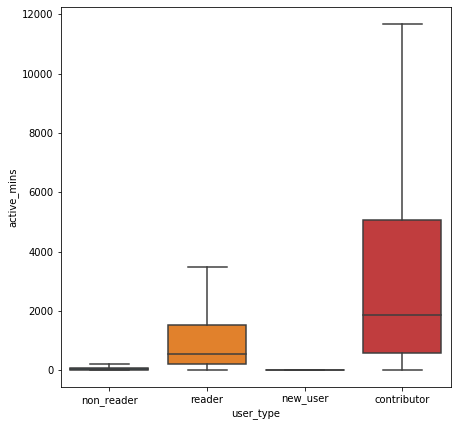

In [151]:
a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(y=control_attr.active_mins, x=control_attr.user_type, showfliers=False)

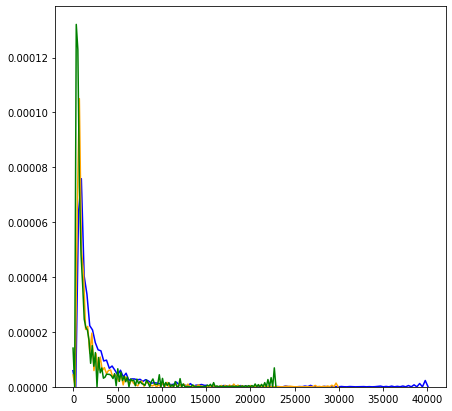

In [149]:
target_0 = control_attr.loc[control_attr['gender'] == 'male']
target_1 = control_attr.loc[control_attr['gender'] == 'female']
target_2 = control_attr.loc[control_attr['gender'] == 'unknown']

a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.distplot(target_0[['active_mins']], hist=False, color='blue')
sns.distplot(target_1[['active_mins']], hist=False, color= 'orange')
sns.distplot(target_2[['active_mins']], hist=False, color= 'green')

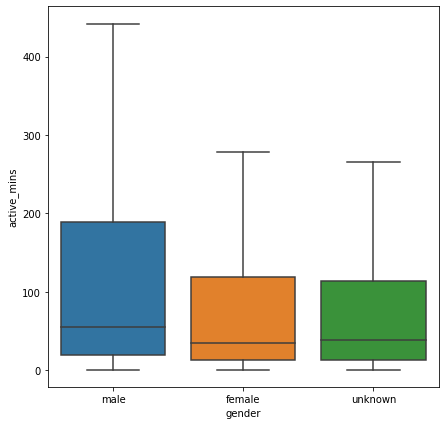

In [152]:
a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(y=control_attr.active_mins, x=control_attr.gender, showfliers=False)

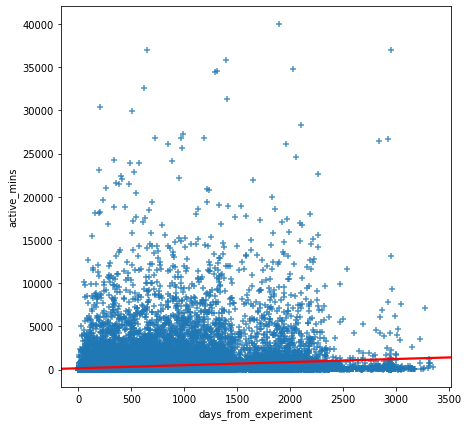

In [84]:
a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.regplot(x="days_from_experiment", y="active_mins", data=control_attr,marker="+", line_kws={'color': 'red'})

## 3. Sanity checks for the experiment 

### 3.1 Are test and control randomized?

#### 3.1.1. User attributes

##### days on the platform

In [85]:
user_attributes[['variant_number', 'days_from_experiment']].groupby('variant_number').describe()

days_from_experiment                                      \
                              count       mean         std  min     25%   
variant_number                                                            
0                           40000.0  621.00015  607.963228  2.0  135.75   
1                           10000.0  598.84600  607.062397  2.0  108.75   

                                       
                  50%     75%     max  
variant_number                         
0               428.0  937.25  3352.0  
1               377.0  930.25  3179.0

In [86]:
from scipy import stats
stats.ttest_ind(user_attributes[user_attributes.variant_number==0].days_from_experiment,
                user_attributes[user_attributes.variant_number==1].days_from_experiment)

Ttest_indResult(statistic=3.260253790974953, pvalue=0.0011138698490600922)

In [87]:
# Observation: not balanced on age on the platform

##### gender

In [88]:
user_attributes.gender.value_counts(normalize=True)

male       0.55514
female     0.28954
unknown    0.15532
Name: gender, dtype: float64

In [89]:
user_attributes[user_attributes.variant_number==0].gender.value_counts(normalize=True)

male       0.555925
female     0.290175
unknown    0.153900
Name: gender, dtype: float64

In [90]:
user_attributes[user_attributes.variant_number==1].gender.value_counts(normalize=True)

male       0.552
female     0.287
unknown    0.161
Name: gender, dtype: float64

In [91]:
male_v0= user_attributes[(user_attributes.variant_number==0) & (user_attributes.gender=='male')].shape[0]
male_v1= user_attributes[(user_attributes.variant_number==1) & (user_attributes.gender=='male')].shape[0]
v0 = user_attributes[(user_attributes.variant_number==0)].shape[0]
v1 = user_attributes[(user_attributes.variant_number==1)].shape[0]

In [92]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

count = np.array([male_v0, male_v1])
nobs = np.array([v0, v1])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.480


In [93]:
# Observation: balanced on gender

##### user type

In [94]:
user_attributes.user_type.value_counts(normalize=True)

non_reader     0.72132
reader         0.16004
new_user       0.09776
contributor    0.02088
Name: user_type, dtype: float64

In [95]:
user_attributes[user_attributes.variant_number==0].user_type.value_counts(normalize=True)

non_reader     0.717475
reader         0.168325
new_user       0.091325
contributor    0.022875
Name: user_type, dtype: float64

In [96]:
user_attributes[user_attributes.variant_number==1].user_type.value_counts(normalize=True)

non_reader     0.7367
reader         0.1269
new_user       0.1235
contributor    0.0129
Name: user_type, dtype: float64

In [97]:
contri_v0 = user_attributes[(user_attributes.variant_number==0) & (user_attributes.user_type=='contributor')].shape[0]
contri_v1 = user_attributes[(user_attributes.variant_number==1) & (user_attributes.user_type=='contributor')].shape[0]

In [98]:
nreader_v0 = user_attributes[(user_attributes.variant_number==0) & (user_attributes.user_type=='non_reader')].shape[0]
nreader_v1 = user_attributes[(user_attributes.variant_number==1) & (user_attributes.user_type=='non_reader')].shape[0]

In [99]:
count = np.array([contri_v0, contri_v1])
nobs = np.array([v0, v1])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.000


In [100]:
count = np.array([nreader_v0, nreader_v1])
nobs = np.array([v0, v1])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.000


In [ ]:
# Observation: not balanced on user_type

#### 3.1.2 Difference in active minutes between groups

In [ ]:
# Before the experiment

In [101]:
control_attr[['variant_number', 'active_mins']].groupby('variant_number').describe()

active_mins                                                   \
                     count        mean          std  min   25%   50%    75%   
variant_number                                                                
0                  39757.0  410.516362  1554.101398  1.0  16.0  48.0  166.0   
1                   9918.0  235.410365   925.178191  1.0  14.0  38.0  120.0   

                         
                    max  
variant_number           
0               40041.0  
1               32597.0

In [102]:
# This doesn't take effect of other factors into consideration
stats.ttest_ind(control_attr[control_attr.variant_number==0].active_mins,
                control_attr[control_attr.variant_number==1].active_mins)

Ttest_indResult(statistic=10.755620371275551, pvalue=5.970529665200043e-27)

In [138]:
import statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(control_attr[control_attr.variant_number==0].active_mins), 
                      sms.DescrStatsW(control_attr[control_attr.variant_number==1].active_mins))
cm.tconfint_diff(alpha=0.05, alternative='two-sided',usevar='pooled')

(143.19618618011435, 207.01580763106858)

In [ ]:
# There is a difference in the mean of two variants - users assigned variant 1 have lower avg active minutes before the experiment

In [103]:
import statsmodels.api as  sm
import statsmodels.formula.api as smf

In [104]:
control_attr.head()

,uid,active_mins,variant_number,signup_date,days_from_experiment,gender,user_type
0,0,70.0,0,2018-09-24,135.0,male,non_reader
1,1,15618.0,0,2016-11-07,821.0,male,reader
2,2,37.0,0,2018-09-17,142.0,male,non_reader
3,3,29.0,0,2018-03-04,339.0,male,non_reader
4,4,57.0,0,2017-03-09,699.0,male,non_reader


In [105]:
control_model = smf.glm(formula='active_mins ~ variant_number + days_from_experiment + C(gender) + C(user_type)',
                        data=control_attr, family=sm.families.Poisson()).fit()

In [106]:
control_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            active_mins   No. Observations:                49675
Model:                            GLM   Df Residuals:                    49667
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3899e+07
Date:                Sun, 08 Dec 2019   Deviance:                   2.7508e+07
Time:                        10:50:10   Pearson chi2:                 6.16e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.8778      0.001    1.1e+04      0.000       7.876       7.879
C(gender)[T.male]              0.1900      0.001    329.310      0.000       0.189       0.191
C(gender)[T.unknown]           0.1214      0.001    144.991      0.000       0.120       0.123
C(user_type)[T.new_user]      -6.1656      0.006  -1018.026      0.000      -6.177      -6.154
C(user_type)[T.non_reader]    -3.7337      0.001  -4985.743      0.000      -3.735      -3.732
C(user_type)[T.reader]        -1.0531      0.001  -1849.630      0.000      -1.054      -1.052
variant_number                -0.2739      0.001   -390.549      0.000      -0.275      -0.273
days_from_experiment           0.0004    3.3e-07   1068.348      0.000       0.000       0.000
==============================================================================================
"""

In [107]:
# Experiment

In [108]:
experiment_attr[['variant_number', 'active_mins']].groupby('variant_number').describe()

active_mins                                                   \
                     count        mean          std  min   25%   50%    75%   
variant_number                                                                
0                  37425.0  458.221162  1653.447132  1.0  16.0  52.0  191.0   
1                   9208.0  458.402476  1680.571091  1.0  23.0  71.0  227.0   

                         
                    max  
variant_number           
0               37191.0  
1               46742.0

In [110]:
# This doesn't take effect of other factors into consideration
stats.ttest_ind(experiment_attr[experiment_attr.variant_number==0].active_mins,
                experiment_attr[experiment_attr.variant_number==1].active_mins)

Ttest_indResult(statistic=-0.009396017075725334, pvalue=0.9925032135466763)

In [137]:
cm = sms.CompareMeans(sms.DescrStatsW(experiment_attr[experiment_attr.variant_number==0].active_mins), 
                      sms.DescrStatsW(experiment_attr[experiment_attr.variant_number==1].active_mins))
cm.tconfint_diff(alpha=0.05, alternative='two-sided',usevar='pooled')

(-38.00347887059214, 37.640851304425915)

In [111]:
experiment_model = smf.glm(formula='active_mins ~ variant_number + days_from_experiment + C(gender) + C(user_type)',
                        data=experiment_attr, family=sm.families.Poisson()).fit()

In [112]:
experiment_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            active_mins   No. Observations:                46633
Model:                            GLM   Df Residuals:                    46625
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.7600e+07
Date:                Sun, 08 Dec 2019   Deviance:                   3.4920e+07
Time:                        10:50:49   Pearson chi2:                 8.28e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.9698      0.001   1.16e+04      0.000       7.968       7.971
C(gender)[T.male]              0.2631      0.001    487.145      0.000       0.262       0.264
C(gender)[T.unknown]           0.0599      0.001     74.842      0.000       0.058       0.062
C(user_type)[T.new_user]      -4.6386      0.003  -1517.962      0.000      -4.645      -4.633
C(user_type)[T.non_reader]    -3.5786      0.001  -5180.863      0.000      -3.580      -3.577
C(user_type)[T.reader]        -1.0029      0.001  -1829.094      0.000      -1.004      -1.002
variant_number                 0.2610      0.001    478.686      0.000       0.260       0.262
days_from_experiment           0.0002    3.2e-07    658.605      0.000       0.000       0.000
==============================================================================================
"""

In [ ]:
# Observation: There is an increase in the active time in variant 1 users

In [114]:
# source: https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4
experiment_attr['BB_LAMBDA'] = experiment_model.mu
experiment_attr['AUX_OLS_DEP'] = experiment_attr.apply(lambda x: ((x['active_mins'] - x['BB_LAMBDA'])**2 - x['active_mins']) / x['BB_LAMBDA'], axis=1)
aux_olsr_results = smf.ols("AUX_OLS_DEP ~ BB_LAMBDA - 1", experiment_attr).fit()
print(aux_olsr_results.params)

BB_LAMBDA    2.250979
dtype: float64


In [115]:
# improved log-likelihood, deviance, and pearson chi2 
experiment_model_nb = smf.glm(formula='active_mins ~ variant_number + days_from_experiment + C(gender) + C(user_type)',
                        data=experiment_attr, family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
experiment_model_nb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            active_mins   No. Observations:                46633
Model:                            GLM   Df Residuals:                    46625
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.8480e+05
Date:                Sun, 08 Dec 2019   Deviance:                       41800.
Time:                        10:51:40   Pearson chi2:                 2.05e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.9297      0.049    162.181      0.000       7.834       8.026
C(gender)[T.male]              0.1977      0.016     12.248      0.000       0.166       0.229
C(gender)[T.unknown]           0.0166      0.022      0.753      0.451      -0.027       0.060
C(user_type)[T.new_user]      -4.6226      0.055    -84.510      0.000      -4.730      -4.515
C(user_type)[T.non_reader]    -3.5897      0.047    -75.800      0.000      -3.682      -3.497
C(user_type)[T.reader]        -0.9939      0.050    -20.067      0.000      -1.091      -0.897
variant_number                 0.4261      0.018     24.324      0.000       0.392       0.460
days_from_experiment           0.0003   1.21e-05     23.197      0.000       0.000       0.000
==============================================================================================
"""

In [ ]:
# Variant 1 has approximately 1.5x active_mins after launching the experiment. 
# This indicates positive impact of the experiment on the test group 
# (coef of variant_number changed was -ve before the experiment and is +ve after launching the experiment)

## 4. Analyzing the lift

In [117]:
len(set(list(control_attr.uid)).intersection(set(list(experiment_attr.uid))))

46467

In [118]:
len(set(list(experiment_attr.uid)))

46633

In [119]:
lift = experiment_attr.merge(control_attr[["uid","active_mins"]], on='uid', how='inner')

In [120]:
len(set(list(lift.uid)))

46467

In [121]:
lift['lift_active_mins'] = lift.active_mins_x - lift.active_mins_y

In [122]:
lift.head()

,uid,active_mins_x,variant_number,signup_date,days_from_experiment,gender,user_type,BB_LAMBDA,AUX_OLS_DEP,active_mins_y,lift_active_mins
0,0,43.0,0,2018-09-24,135.0,male,non_reader,108.072368,38.783392,70.0,-27.0
1,1,15205.0,0,2016-11-07,821.0,male,reader,1641.328530,112078.706560,15618.0,-413.0
2,2,17.0,0,2018-09-17,142.0,male,non_reader,108.232110,76.745227,37.0,-20.0
3,3,77.0,0,2018-03-04,339.0,male,non_reader,112.825837,10.693389,29.0,48.0
4,4,39.0,0,2017-03-09,699.0,male,non_reader,121.730048,55.904528,57.0,-18.0


In [123]:
lift[['variant_number', 'lift_active_mins']].groupby('variant_number').describe()

lift_active_mins                                                \
                          count        mean          std      min   25%   50%   
variant_number                                                                  
0                       37303.0   24.230705   850.482313 -19995.0 -30.0  -1.0   
1                        9164.0  207.142296  1061.228821 -19292.0  -7.0  18.0   

                               
                 75%      max  
variant_number                 
0               32.0  20971.0  
1               99.0  27792.0

In [124]:
stats.ttest_1samp(lift[lift.variant_number==0].lift_active_mins,0.0)

Ttest_1sampResult(statistic=5.502659622238858, pvalue=3.765595756168524e-08)

In [125]:
stats.ttest_1samp(lift[lift.variant_number==1].lift_active_mins,0.0)

Ttest_1sampResult(statistic=18.68539529576689, pvalue=1.6998436261449193e-76)

### Difference of differences

In [126]:
stats.ttest_ind(lift[lift.variant_number==0].lift_active_mins,
                lift[lift.variant_number==1].lift_active_mins)

Ttest_indResult(statistic=-17.51006237505111, pvalue=1.9931067407515464e-68)

In [141]:
cm = sms.CompareMeans(sms.DescrStatsW(lift[lift.variant_number==0].lift_active_mins), 
                      sms.DescrStatsW(lift[lift.variant_number==1].lift_active_mins))
cm.tconfint_diff(alpha=0.05, alternative='two-sided',usevar='pooled')

(-203.38607331370056, -162.43710795716729)

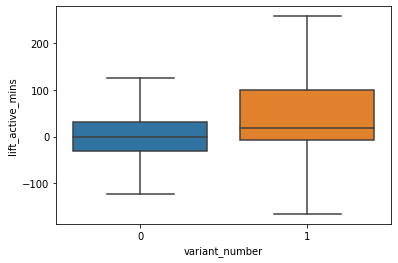

In [143]:
sns.boxplot(x=lift.variant_number, y=lift.lift_active_mins, showfliers=False)

In [ ]:
# Observation: Average increase in lift_active_mins is higher for variant_number 1